# Act 3. Series de tiempo


*   Andrés Alejandro Guzmán González | A01633819
*   Joel Isaías Solano Ocampo        | A01639289
*   Tania Sayuri Guizado Hernandez   | A01640092
*   Ernesto Reynoso Lizárraga        | A01639915







##Librerías

---



In [ ]:
import warnings
import numpy as np
import pandas as pd
from math import sqrt
import datetime as dt
from patsy import dmatrices
import statsmodels.api as sm
from matplotlib import pyplot
import pandas_datareader as web
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Analisis de Series de tiempo

---



1. Proceda con la exploracion inicial de los datos y realize las transformaciones habituales y necesarias para las siguientes situaciones presentes en los datos:

In [ ]:
df = pd.read_table('/content/drive/Shareddrives/Reto IA/Actividades/Estadística/Series_de_tiempo/Dataset/dow_jones_index.data', header=0, infer_datetime_format=True, parse_dates=[0], sep=',', index_col=[0])
print(df.shape)
print(df.head())

(750, 15)
        stock       date    open    high     low   close     volume  \
quarter                                                               
1          AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1          AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
1          AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
1          AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
1          AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

         percent_change_price  percent_change_volume_over_last_wk  \
quarter                                                             
1                     3.79267                                 NaN   
1                    -4.42849                            1.380223   
1                    -2.47066                          -43.024959   
1                     1.63831                            9.355500   
1                     5.93325                            1.987452   

        

* Orden ascendente / descendente por fechas.

In [ ]:
df.set_index('date', inplace=True)
df.sort_values(by='date', inplace=True)
df

,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,
1/14/2011,JPM,$43.27,$44.97,$43.00,$44.91,144662779,3.790150,-38.322710,2.345479e+08,$45.02,$45.29,0.599733,80,0.556669
1/14/2011,PFE,$18.22,$18.48,$18.13,$18.34,218359623,0.658617,-43.547849,3.868048e+08,$18.35,$18.36,0.054496,19,1.090510
1/14/2011,KO,$62.70,$63.86,$62.56,$63.13,31297830,0.685805,-47.664407,5.980219e+07,$63.21,$62.77,-0.696092,56,0.744496
1/14/2011,BAC,$14.17,$15.25,$14.09,$15.25,760935694,7.621740,-47.645833,1.453439e+09,$15.08,$14.25,-5.503980,47,0.065574
1/14/2011,KRFT,$30.91,$31.72,$30.89,$31.34,24955086,1.391140,-44.509442,4.497177e+07,$31.41,$31.35,-0.191022,74,0.925335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/3/2011,BAC,$11.87,$11.92,$11.08,$11.28,596420503,-4.970510,24.412611,4.793891e+08,$11.18,$10.80,-3.398930,89,0.088652
6/3/2011,VZ,$36.91,$36.99,$35.60,$35.63,50174214,-3.467890,15.608455,4.340012e+07,$35.57,$35.19,-1.068320,33,1.375250
6/3/2011,HD,$36.18,$36.28,$34.43,$34.63,39307513,-4.284130,-3.359081,4.067378e+07,$34.53,$33.47,-3.069790,11,0.721917


In [ ]:
x = df.loc[:, ['high', 'low', 'percent_change_price']]
print(x.head())

             high     low  percent_change_price
date                                           
1/14/2011  $44.97  $43.00              3.790150
1/14/2011  $18.48  $18.13              0.658617
1/14/2011  $63.86  $62.56              0.685805
1/14/2011  $15.25  $14.09              7.621740
1/14/2011  $31.72  $30.89              1.391140


* Valores string con símbolos o delimitadores.

In [ ]:
cols = ['high', 'low']
x[cols] = x[cols].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(x.head())

            high    low  percent_change_price
date                                         
1/14/2011  44.97  43.00              3.790150
1/14/2011  18.48  18.13              0.658617
1/14/2011  63.86  62.56              0.685805
1/14/2011  15.25  14.09              7.621740
1/14/2011  31.72  30.89              1.391140


In [ ]:
y = df.loc[:, ['volume']]
print(y.head())

              volume
date                
1/14/2011  144662779
1/14/2011  218359623
1/14/2011   31297830
1/14/2011  760935694
1/14/2011   24955086


In [ ]:
df = pd.concat([x, y],axis=1)

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
print(df.index[:5])

DatetimeIndex(['2011-01-14', '2011-01-14', '2011-01-14', '2011-01-14',
               '2011-01-14'],
              dtype='datetime64[ns]', name='date', freq=None)


*   Formatos adecuados de fechas (datetime).



In [ ]:
ds = df.index.to_series()
print(ds.head())

date
2011-01-14   2011-01-14
2011-01-14   2011-01-14
2011-01-14   2011-01-14
2011-01-14   2011-01-14
2011-01-14   2011-01-14
Name: date, dtype: datetime64[ns]


In [ ]:
df['month'] = ds.dt.month
df['day_of_week'] = ds.dt.dayofweek
df['day'] = ds.dt.day

* Múltiples muestras en mismas fechas.

In [ ]:
df['2011']

,high,low,percent_change_price,volume,month,day_of_week,day
date,,,,,,,
2011-01-14,44.97,43.00,3.790150,144662779,1,4,14
2011-01-14,18.48,18.13,0.658617,218359623,1,4,14
2011-01-14,63.86,62.56,0.685805,31297830,1,4,14
2011-01-14,15.25,14.09,7.621740,760935694,1,4,14
2011-01-14,31.72,30.89,1.391140,24955086,1,4,14
...,...,...,...,...,...,...,...
2011-06-03,11.92,11.08,-4.970510,596420503,6,4,3
2011-06-03,36.99,35.60,-3.467890,50174214,6,4,3
2011-06-03,36.28,34.43,-4.284130,39307513,6,4,3


In [ ]:
df['2011-02-04':'2011-04-01']

,high,low,percent_change_price,volume,month,day_of_week,day
date,,,,,,,
2011-02-11,21.86,21.35,0.091996,236842359,2,4,11
2011-02-11,166.25,163.18,-0.140176,26106753,2,4,11
2011-02-11,64.97,63.80,1.219700,51999812,2,4,11
2011-02-11,98.23,95.70,-0.853207,38838595,2,4,11
2011-02-11,91.95,87.81,4.117050,16315175,2,4,11
...,...,...,...,...,...,...,...
2011-04-01,42.83,37.60,-3.394630,90069975,4,4,1
2011-04-01,17.80,17.02,1.984820,103320396,4,4,1
2011-04-01,38.95,37.42,2.751070,96766651,4,4,1


In [ ]:
df_count = df.groupby([df.index]).count()

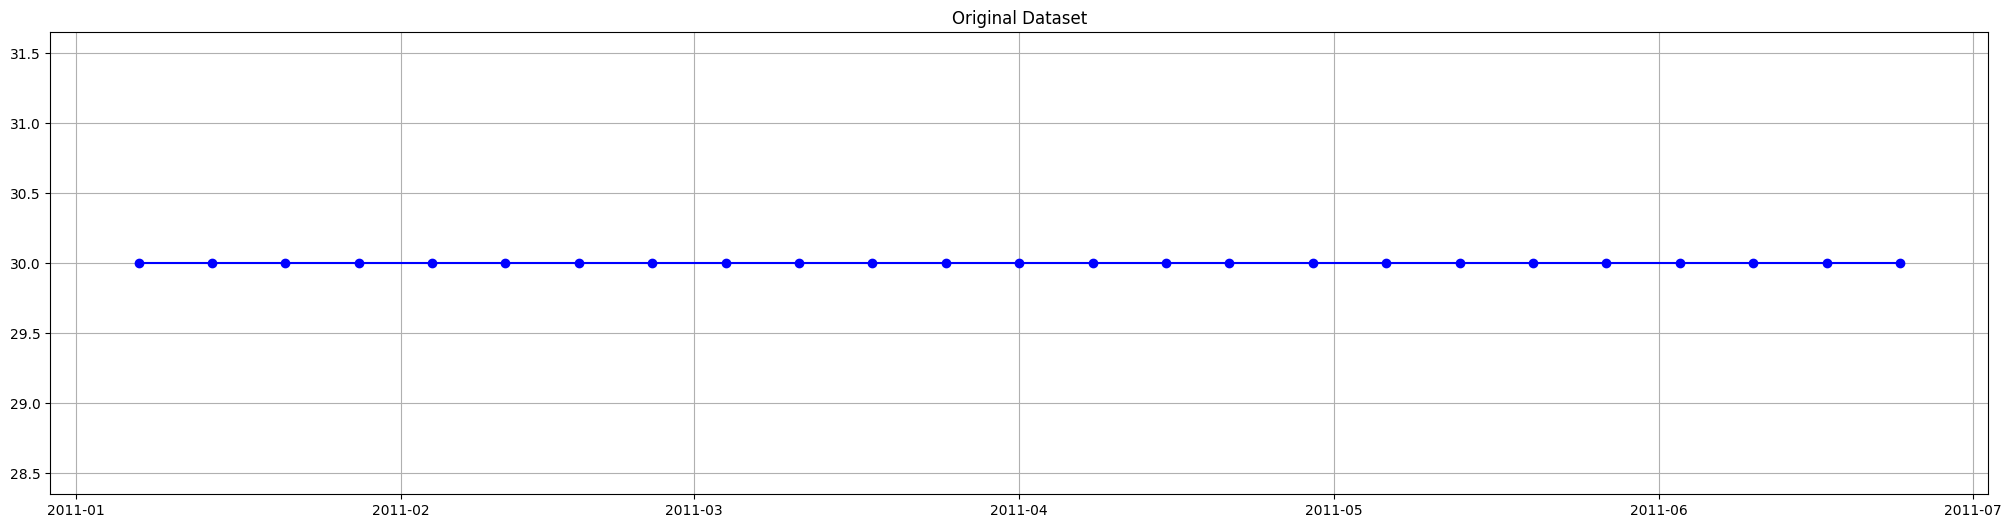

In [ ]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_count.index, df_count['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

In [ ]:
df_mean = df.groupby([df.index]).mean()

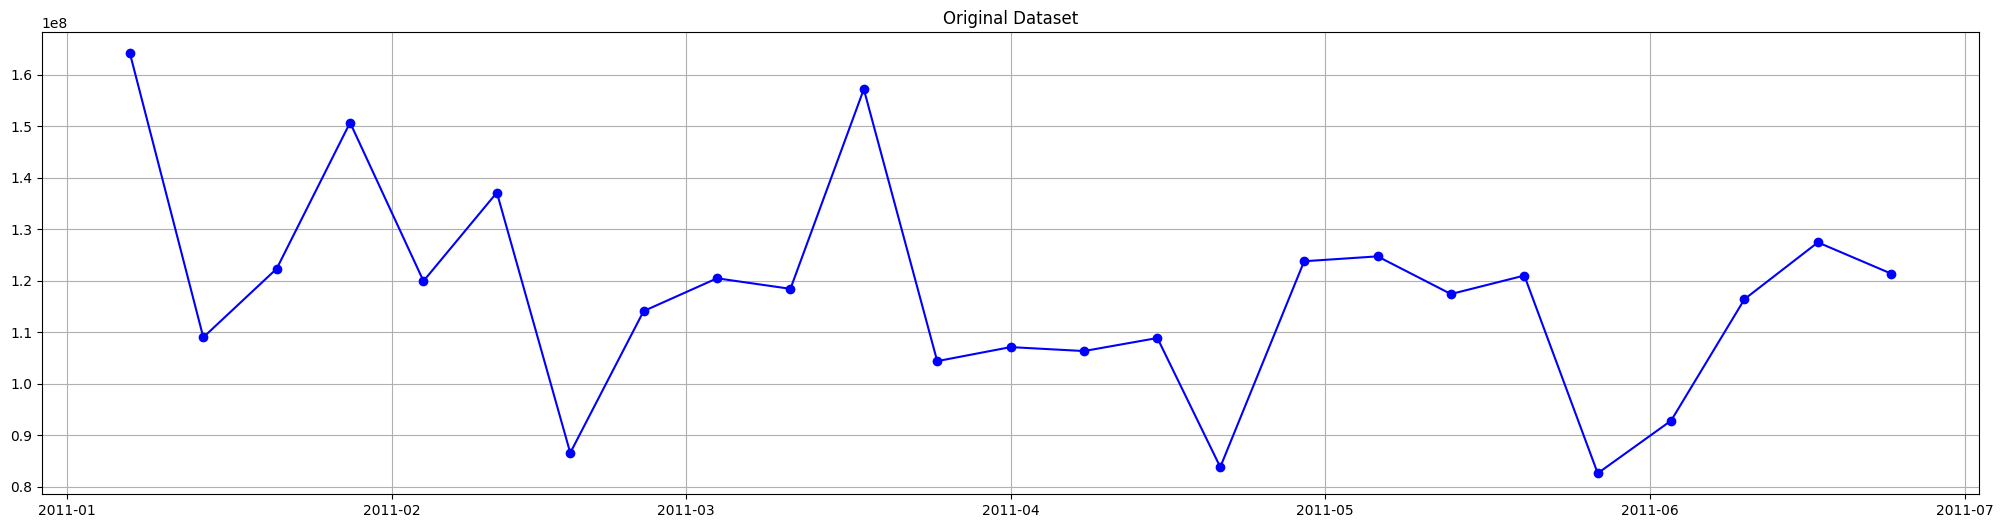

In [ ]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_mean.index, df_mean['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

In [ ]:
df_median = df.groupby([df.index]).median()

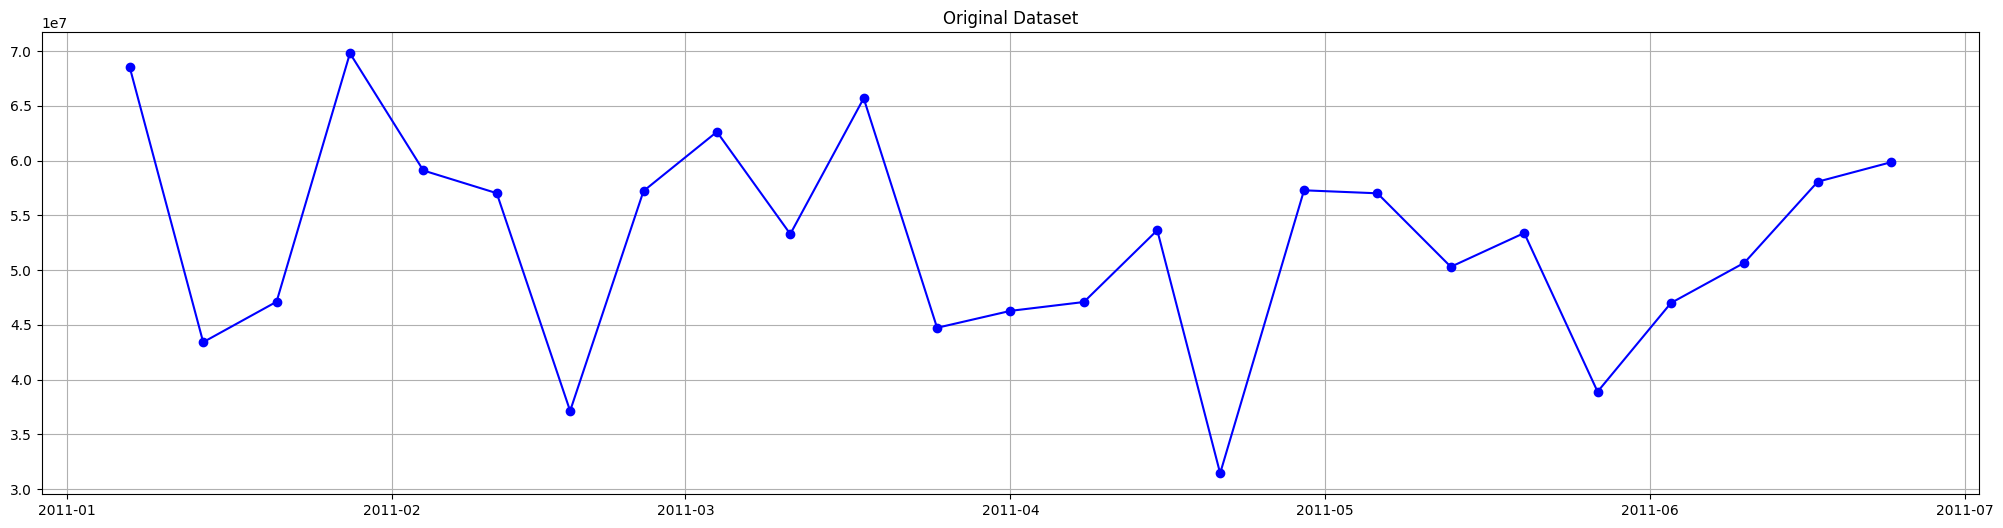

In [ ]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_median.index, df_median['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

In [ ]:
df_mode = df.groupby([df.index]).apply(lambda x: x.mode().iloc[0])

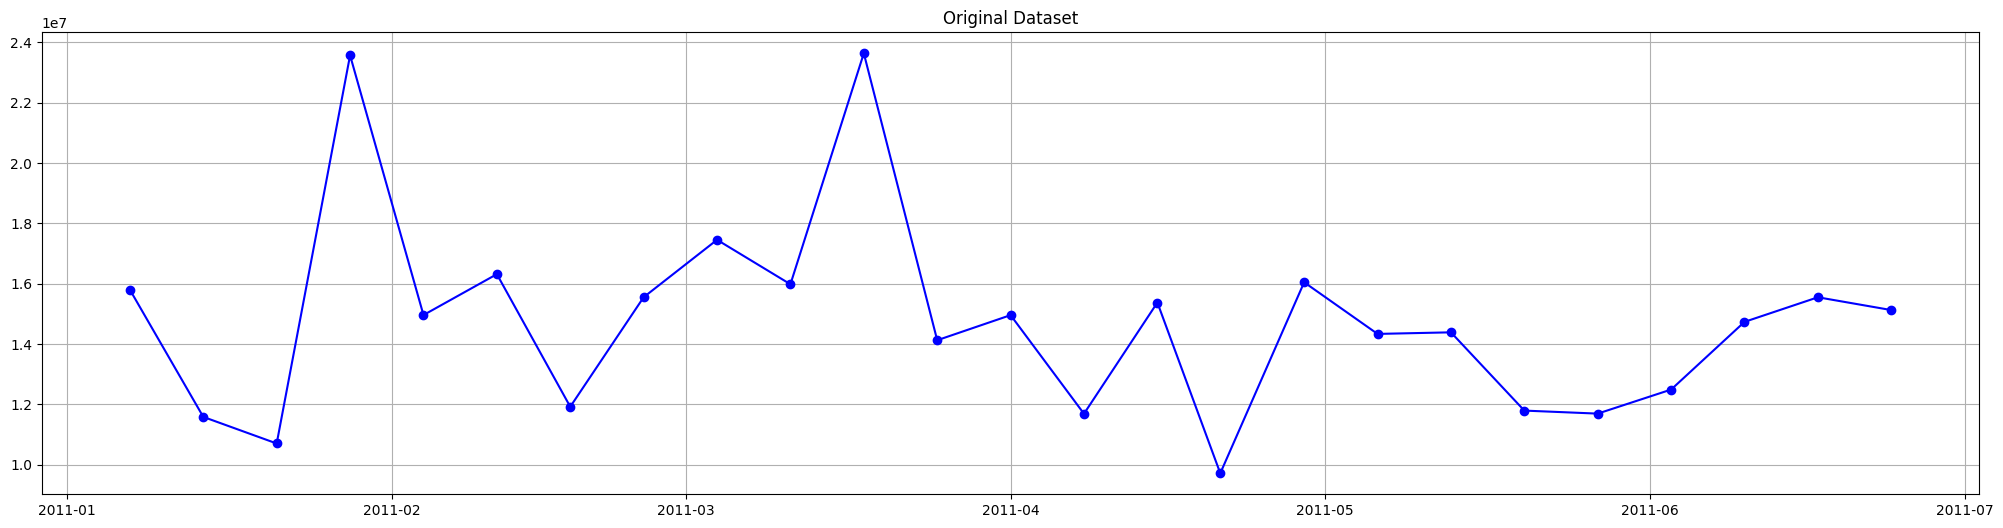

In [ ]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_mode.index, df_mode['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

In [ ]:
df_min = df.groupby([df.index]).min()

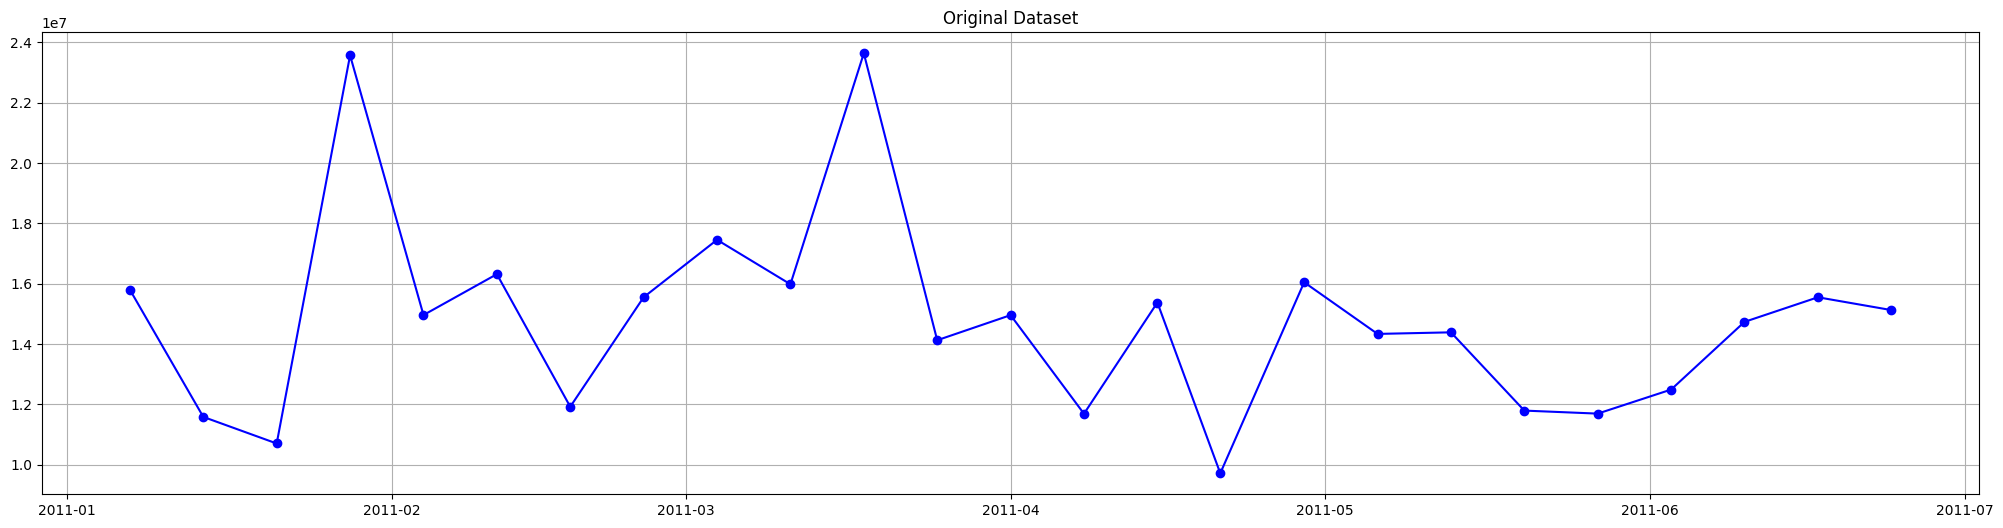

In [ ]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_min.index, df_min['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

In [ ]:
df_max = df.groupby([df.index]).max()

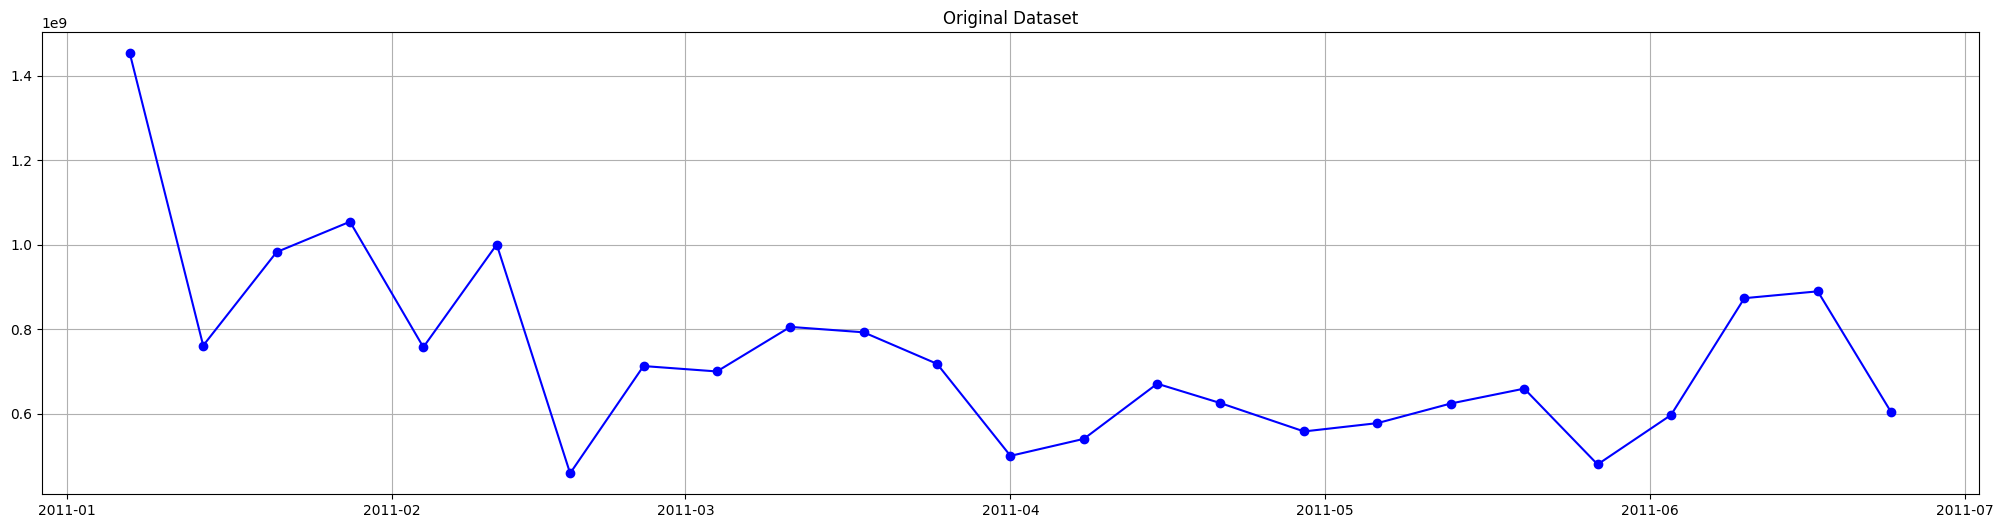

In [ ]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_max.index, df_max['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

In [ ]:
df = df_mean

##Estacionaria

---



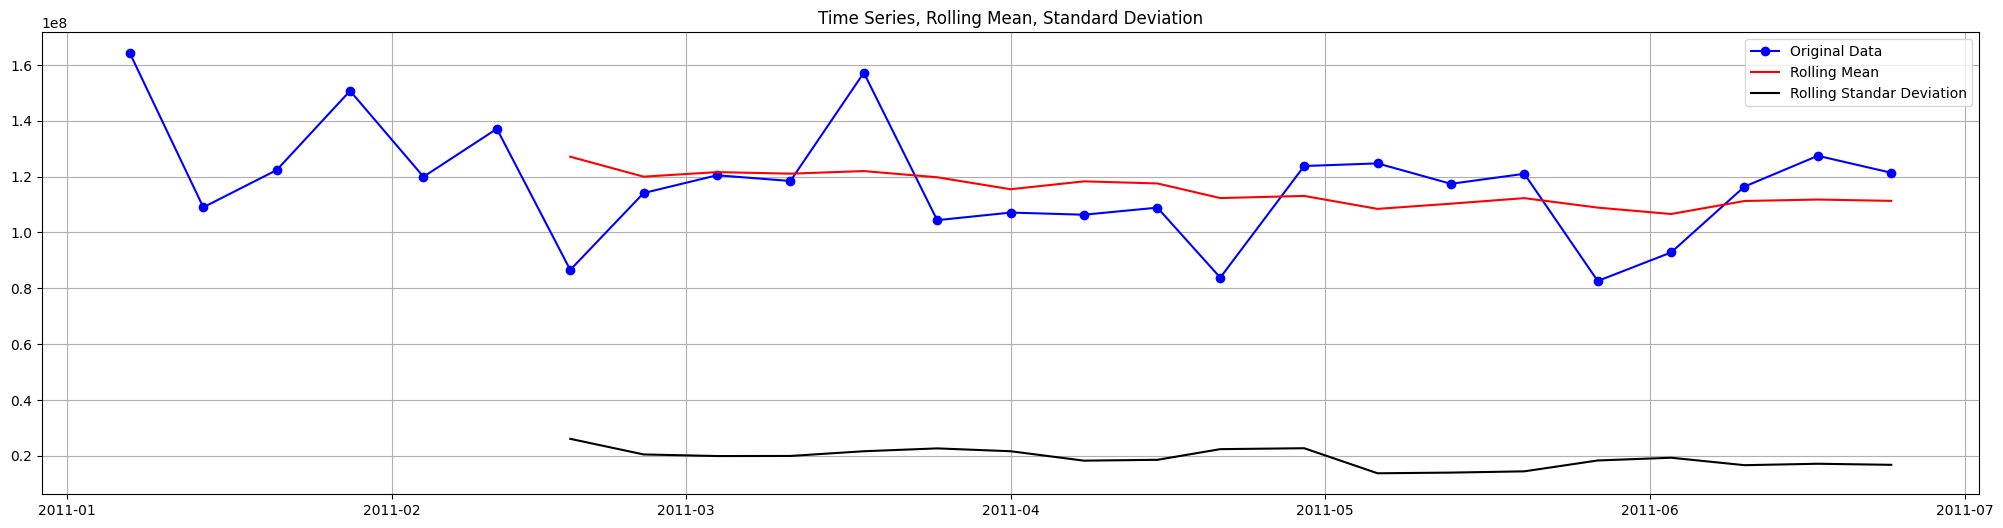

In [ ]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

fig = plt.figure(figsize=(25,6))

original, = plt.plot(df.index, df['volume'], 'bo-', label='Original Data')
roll_mean, = plt.plot(rolling_mean.index, rolling_mean['volume'], 'r-', label='Rolling Mean')
roll_std, = plt.plot(rolling_std.index, rolling_std['volume'], 'k-', label='Rolling Standar Deviation')

plt.title('Time Series, Rolling Mean, Standard Deviation')
plt.legend(handles=[original, roll_mean, roll_std], loc='best')
plt.grid()
plt.show()

In [ ]:
adf = adfuller(df['volume'], maxlag = 1)

print('T-test (Test Statistic): ', adf[0], '\n')
print('P-value: ', adf[1], '\n')
print('Valores criticos (Critical Value): ', adf[4])

T-test (Test Statistic):  -5.26849555635069 

P-value:  6.361332458733481e-06 

Valores criticos (Critical Value):  {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


##Transformación y Diferenciación

---



2. Realice los procesos para la verificacion de la propiedad de estacionariedad (Visual, Dickey-Fuller).

In [ ]:
result = adfuller(df['volume'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')

ADF Statistic: -5.26849555635069
p-value: 6.361332458733481e-06
Critical Values:


In [ ]:
ts_log = np.log(df['volume'])
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_log.dropna(inplace=True)

In [ ]:
result = adfuller(ts_log)

print('ADF Statistic', result[0])
print('p-value', result[1])
print('Critical Values')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic -1.2521333502416607
p-value 0.6507771979967883
Critical Values
	1%: -3.924
	5%: -3.068
	10%: -2.674


In [ ]:
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)

In [ ]:
result = adfuller(ts_log_moving_avg_diff)

print('ADF Statistic', result[0])
print('p-value', result[1])
print('Critical Values')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic -1.5992926601581914
p-value 0.48394878241086026
Critical Values
	1%: -4.665
	5%: -3.367
	10%: -2.803


In [ ]:
ts_log_diff = ts_log - ts_log.shift(periods=8)
ts_log_diff.dropna(inplace=True)

In [ ]:
result = adfuller(ts_log_diff)

print('ADF Statistic', result[0])
print('p-value', result[1])
print('Critical Values')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic -5.190360060157618
p-value 9.199372642580485e-06
Critical Values
	1%: -3.924
	5%: -3.068
	10%: -2.674


##Regresión de Poisson:

---



3. Utiliza el modelo de regresion de Poisson en un conjunto de datos de entrenamiento. Posteriormente, haga una predicción con los datos de prueba, imprima el resumen del modelo, error (MSE) y la grafica.

In [ ]:
mask = np.random.rand(len(df)) < 0.7

df_train = df[mask]
df_test = df[~mask]

print('Training data set length: ', len(df_train))
print('Testing data set length: ', len(df_test))

Training data set length:  17
Testing data set length:  8


In [ ]:
expr = """volume ~ day + day_of_week + month + high + low + percent_change_price"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

print(X_train.head())
print(y_train.head())

            Intercept   day  day_of_week  month       high        low  \
date                                                                    
2011-01-14        1.0  14.0          4.0    1.0  52.315333  50.572000   
2011-01-21        1.0  21.0          4.0    1.0  52.934333  51.229333   
2011-01-28        1.0  28.0          4.0    1.0  53.713667  51.400333   
2011-02-04        1.0   4.0          4.0    2.0  53.592333  51.746333   
2011-02-11        1.0  11.0          4.0    2.0  54.679333  52.763000   

            percent_change_price  
date                              
2011-01-14              1.322282  
2011-01-21              0.156960  
2011-01-28             -0.597219  
2011-02-04              2.099038  
2011-02-11              0.922095  
                  volume
date                    
2011-01-14  1.090246e+08
2011-01-21  1.223585e+08
2011-01-28  1.507353e+08
2011-02-04  1.199585e+08
2011-02-11  1.371438e+08


In [ ]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                   17
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.2619e+06
Date:                Fri, 17 Nov 2023   Deviance:                   1.0524e+07
Time:                        04:50:04   Pearson chi2:                 1.06e+07
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               16.9785 

In [ ]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

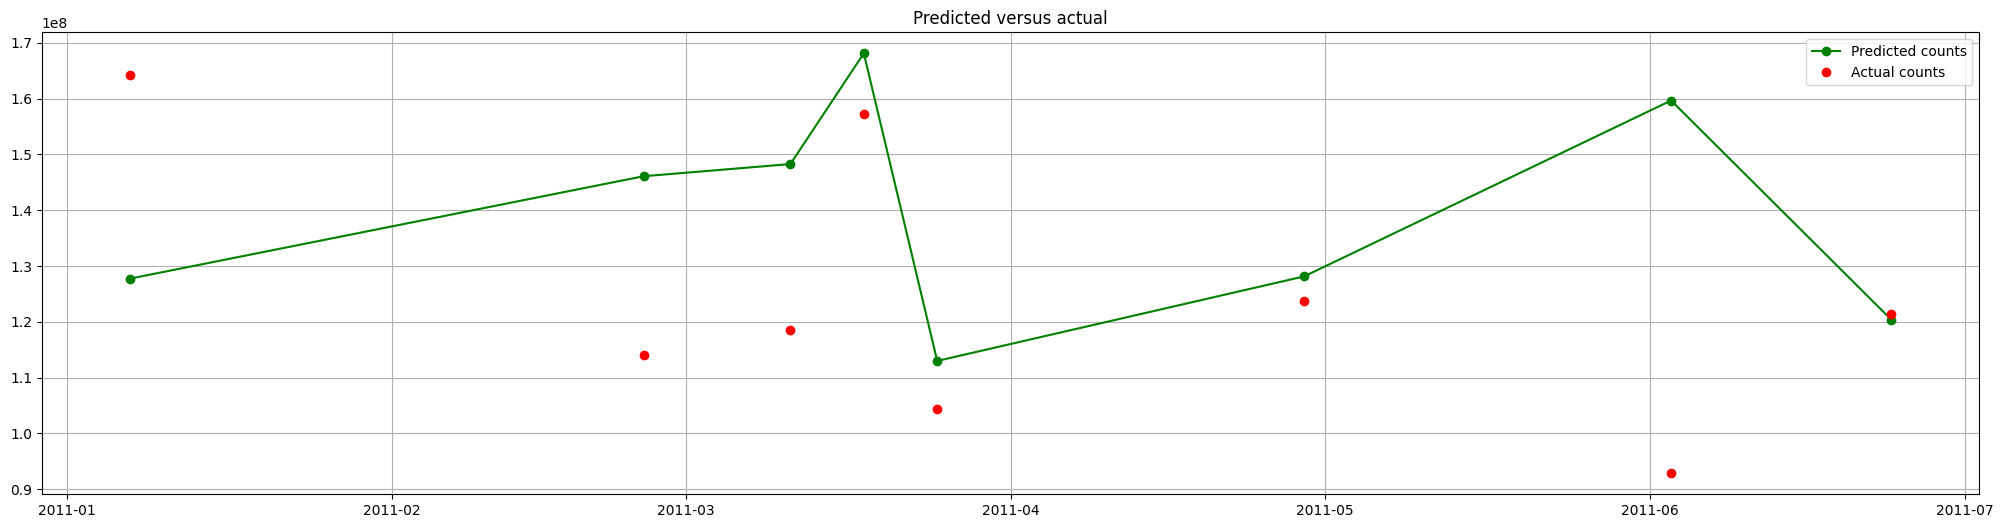

In [ ]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['volume']

fig = plt.figure(figsize=(25,6))

predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro', label='Actual counts')

plt.title('Predicted versus actual')
plt.legend(handles=[predicted, actual])
plt.grid()
plt.show()

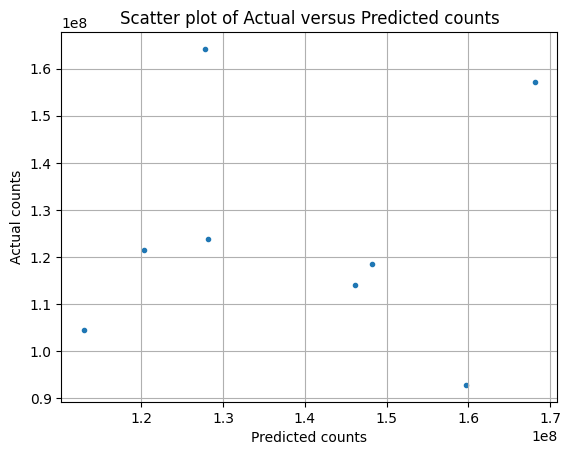

In [ ]:
fig = plt.figure()

plt.scatter(x=predicted_counts, y=actual_counts, marker='.')

plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.grid()
plt.show()

* **Despues de realizar el preprocesamiento de los datos, analisis de estacionariedad y el resumen del modelo ¿Qué información/caracteristicas puede decir de los datos originales?**
El valor de Test Statistic es de -5.26849555635069, en este caso, el valor de la estadística de prueba es menor que el valor crítico del 1%, lo que indica que se puede rechazar la hipótesis nula al 99% de confianza. El valor P-value es de 6.361332458733481e-06, que es menor que el nivel de significancia del 1%. Esto indica que hay suficiente evidencia para rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria y, por lo tanto, no es estacionaria. Los valores críticos son -3.7377092158564813 para el 1%, -2.9922162731481485 para el 5% y -2.635746736111111 para el 10%. Estos valores se utilizan para comparar con el valor de la estadística de prueba para determinar si se puede rechazar la hipótesis nula. La prueba de Dickey-Fuller aumentada es una prueba de raíz unitaria que se utiliza para determinar si una serie de tiempo es estacionaria o no. El modelo se ajusta bien a los datos, con un pseudo R-cuadrado de 1.0.


* **¿Qué pasa si se intenta una operación de extrapolación (Forecasting) de los datos con el modelo?**
La regresión de Poisson es un modelo lineal generalizado que se utiliza para modelar datos de recuento. No consideramos que sea adecuado para la extrapolación de datos, ya que los datos de recuento se limitan a valores enteros positivos y estos no pueden ser negativos. En conclusion, la extrapolación de datos con un modelo de regresión de Poisson puede producir valores negativos, lo que no tiene sentido en el contexto de los datos de recuento.

##Autocorrelación y Autocorrelación:

---



3. Realice una analisis de autocorrelacion y autocorrelacion parcial.

In [ ]:
def autocorrelation_lag(lag):
  autocorrelation_lag = df['volume'].autocorr(lag=lag)
  print('One date Lag{:d}: '.format(lag), autocorrelation_lag)

In [ ]:
autocorrelation_lag(1)

One date Lag1:  0.01341270719330465


In [ ]:
autocorrelation_lag(2)

One date Lag2:  0.009796061559425587


In [ ]:
autocorrelation_lag(3)

One date Lag3:  -0.042923672654262106


In [ ]:
autocorrelation_lag(6)

One date Lag6:  0.046366685046454414


In [ ]:
autocorrelation_lag(9)

One date Lag9:  0.14693871890490812


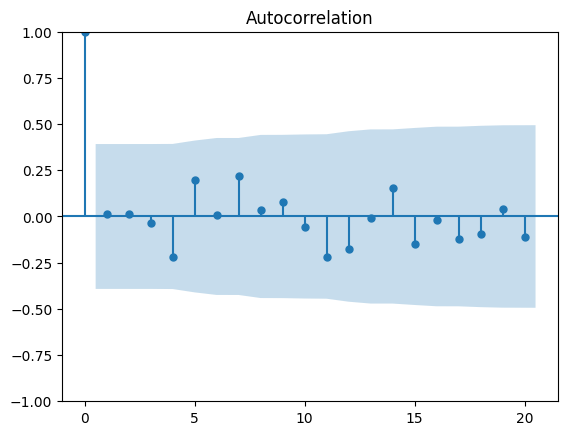

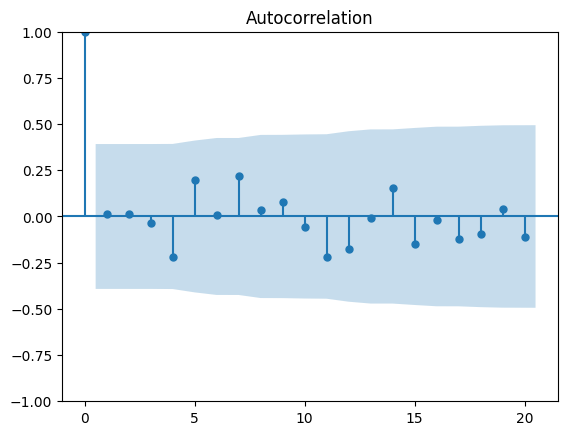

In [ ]:
plot_acf(df['volume'], lags=20)

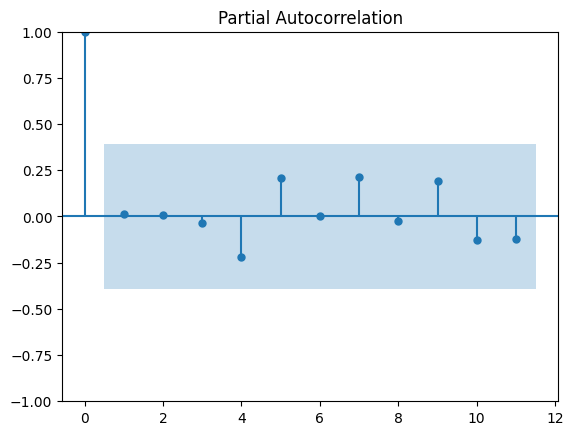

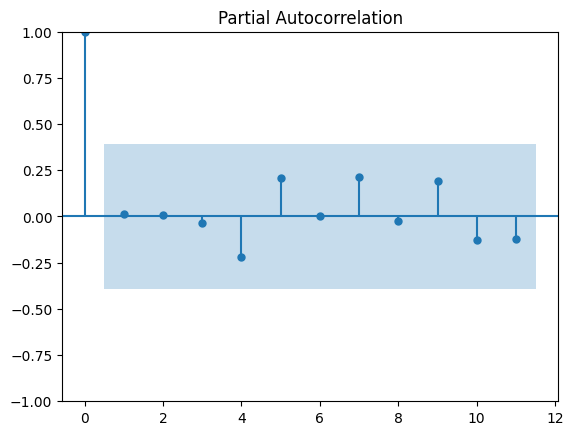

In [ ]:
plot_pacf(df['volume'], lags=11)

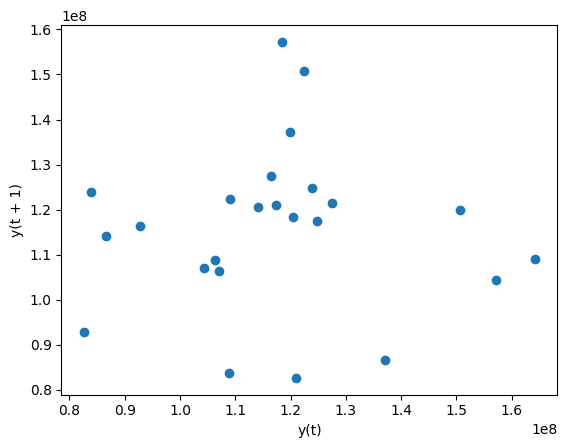

In [ ]:
lag_plot(df['volume'])
pyplot.show()

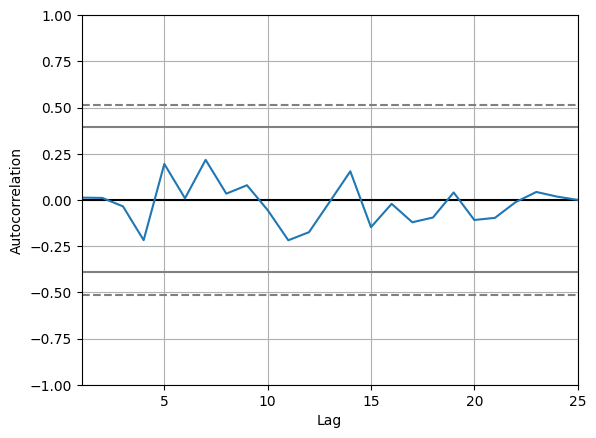

In [ ]:
autocorrelation_plot(df['volume'])
pyplot.show()

In [ ]:
series = df['volume'].copy()
print(series.head())

date
2011-01-07    1.641992e+08
2011-01-14    1.090246e+08
2011-01-21    1.223585e+08
2011-01-28    1.507353e+08
2011-02-04    1.199585e+08
Name: volume, dtype: float64


4. Utiliza el modelo AR en un conjunto de datos de entrenamiento.

In [ ]:
def ar_model(X, lag):
  # X = series.values
  size = int(len(X) * 0.7)
  train, test = X[0:size], X[size:len(X)]
  print('Test size: ', len(test))
  ind_train, ind_test = df.index[0:size], df.index[size:len(X)]

  model = AutoReg(train, lags=lag)
  model_fit = model.fit()
  print('Coefficients: %s' % model_fit.params)

  predictions = model_fit.predict(start=len(train),
                                          end=len(train)+len(test)-1,
                                          dynamic=False)
  for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

  rmse = sqrt(mean_squared_error(test, predictions))
  print('Test RMSE: %.3f' % rmse)

  fig = plt.figure(figsize=(25,6))
  actual, = plt.plot(ind_test, test, 'bo-', label='Actual counts')
  predicted, = plt.plot(ind_test, predictions, 'ro-', label='Predicted counts')
  plt.title('AR - Predicted versus Actual')
  plt.legend(handles=[actual, predicted])
  plt.grid()
  plt.show

* Haga una predicción a corto-plazo con los datos de prueba, imprima el error (MSE) y la grafica.

Test size:  3
Coefficients: [ 2.38881568e+08 -6.35544580e-01 -4.90537109e-01]
predicted=104496967.326454, expected=157229019.833333
predicted=114366509.482570, expected=104403031.666667
predicted=114936912.527249, expected=107127573.466667
Test RMSE: 31309881.445


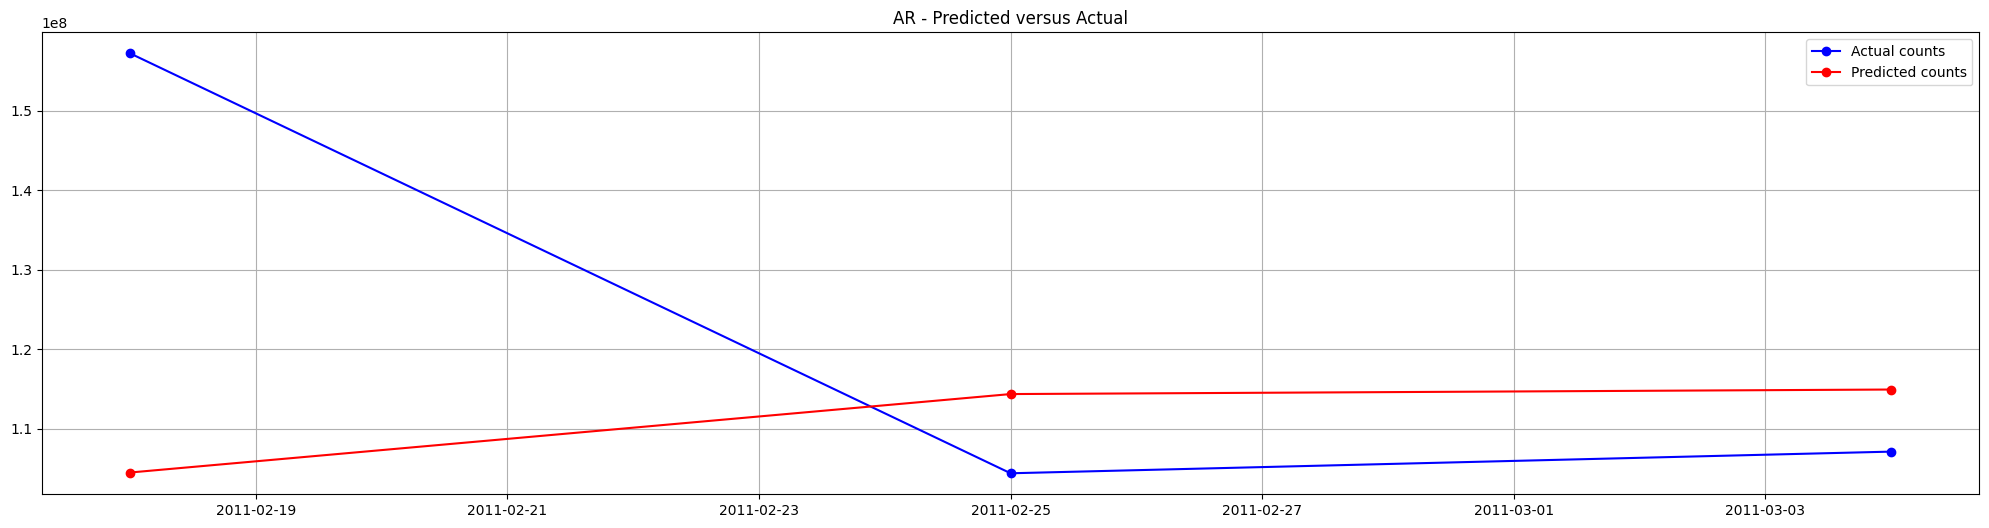

In [ ]:
ar_model(series['2011-02-04':'2011-04-01'].values, 2)

* Haga una predicción continua con los datos de prueba, imprima el error (MSE) y la grafica.

Test size:  8
Coefficients: [ 1.76186779e+08 -1.35843266e-01 -6.21596770e-01  1.21808791e-01
 -3.19706384e-01 -3.33373856e-01  2.70758312e-03  7.30556745e-01]
predicted=165958839.206590, expected=124751594.066667
predicted=93185501.818951, expected=117436999.366667
predicted=90899232.281130, expected=121023933.633333
predicted=136602456.198912, expected=82620614.933333
predicted=97926891.797349, expected=92843928.300000
predicted=65498323.548455, expected=116443430.933333
predicted=153827482.233823, expected=127469133.966667
predicted=174023712.974519, expected=121391559.133333
Test RMSE: 39041413.315


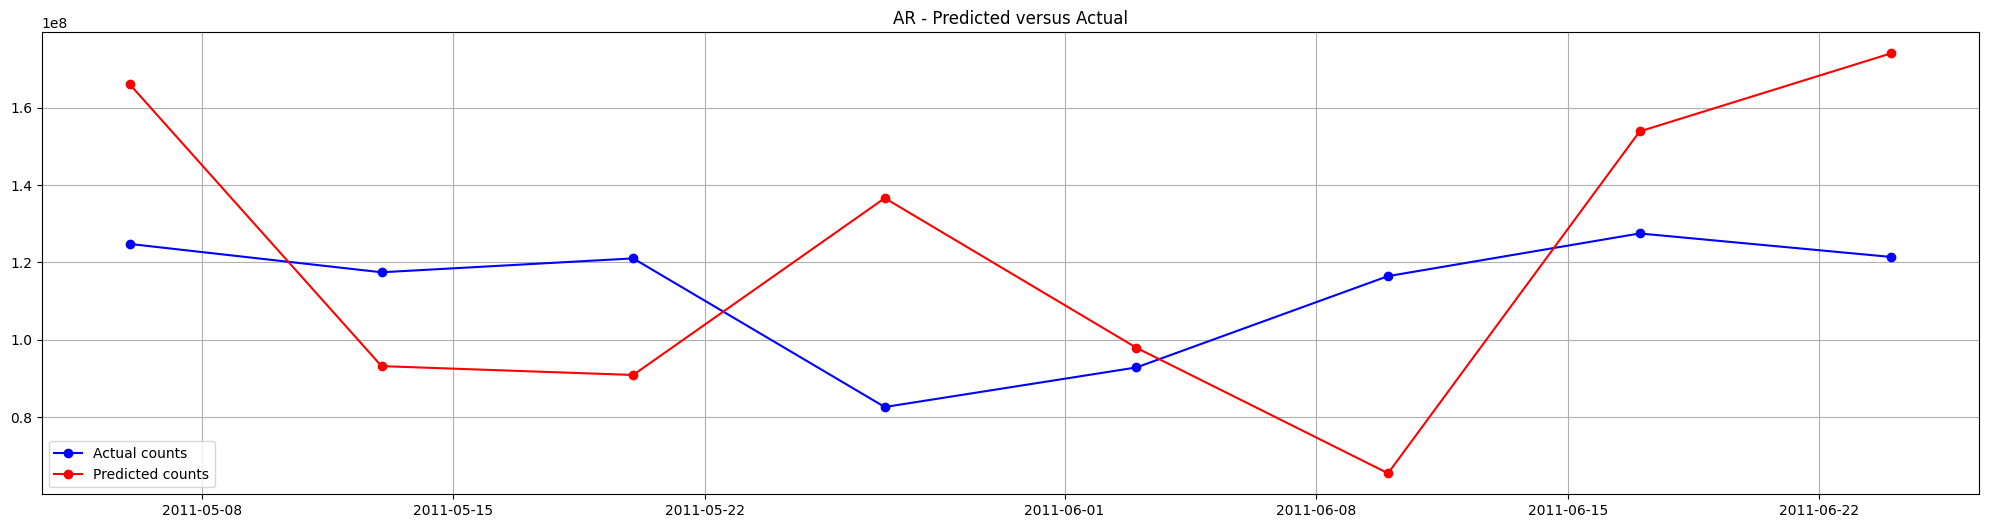

In [ ]:
ar_model(series.values, 7)

* **Compare el resultado con ambos resultado. (error, desviacion de los datos predichos con el tiempo, etc.)**

La primera prueba tiene un tamaño de muestra de 3 y los coeficientes son [2.38881568e+08, -6.35544580e-01, -4.90537109e-01], los coeficientes son los valores que se utilizan para ajustar el modelo a los datos. Los valores predichos y esperados se muestran en la tabla. El RMSE (Error cuadrático medio de la raíz) es una medida de la diferencia entre los valores predichos por un modelo o algoritmo y los valores observados. Es una medida de la precisión del modelo. Para esta prueba el RMSE es de 31,309,881.445.

La segunda prueba tiene un tamaño de muestra de 8 y los coeficientes son [1.76186779e+08, -1.35843266e-01, -6.21596770e-01, 1.21808791e-01, -3.19706384e-01, -3.33373856e-01, 2.70758312e-03, 7.30556745e-01]. La raíz del error cuadrático medio (RMSE) para esta prueba es de 39,041,413.315.

##Modelos ARIMA

---



5. Utiliza el modelo ARIMA en un conjunto de datos de entrenamiento.

In [ ]:
warnings.filterwarnings('ignore')

best_aic = float('inf')
best_order = None

for p in range(1, 20):
  try:
    model = sm.tsa.ARIMA(train, order=(p, 0, 0))
    model_fit = model.fit()
    aic = model_fit.aic
    print(f'AR({p}): AIC = {aic:.2f}')

    if aic < best_aic:
      best_aic = aic
      best_order = (p, 0, 0)
  except Exception as e:
    print(f'Error for AR({p}): {e}')

print(f'\nBest AR order: {best_order} with AIC: {best_aic:.2f}')

AR(1): AIC = 628.69
AR(2): AIC = 630.36
AR(3): AIC = 632.12
AR(4): AIC = 633.60
AR(5): AIC = 635.24
AR(6): AIC = 637.07
AR(7): AIC = 638.29
AR(8): AIC = 1280.96
AR(9): AIC = 456812056609.26
AR(10): AIC = 1329432139556.03
AR(11): AIC = 26.00
AR(12): AIC = 1481343260542.28
Error for AR(13): LU decomposition error.
AR(14): AIC = 450388565559.94
AR(15): AIC = 19289621035.69
AR(16): AIC = 653.58
AR(17): AIC = 655.58
AR(18): AIC = 657.58
AR(19): AIC = 659.58

Best AR order: (11, 0, 0) with AIC: 26.00


In [ ]:
series = df['volume'].copy()
series.index = series.index.to_period('M')
print('\n',series)


 date
2011-01    1.641992e+08
2011-01    1.090246e+08
2011-01    1.223585e+08
2011-01    1.507353e+08
2011-02    1.199585e+08
2011-02    1.371438e+08
2011-02    8.658673e+07
2011-02    1.141245e+08
2011-03    1.204931e+08
2011-03    1.184469e+08
2011-03    1.572290e+08
2011-03    1.044030e+08
2011-04    1.071276e+08
2011-04    1.063614e+08
2011-04    1.088940e+08
2011-04    8.382196e+07
2011-04    1.238058e+08
2011-05    1.247516e+08
2011-05    1.174370e+08
2011-05    1.210239e+08
2011-05    8.262061e+07
2011-06    9.284393e+07
2011-06    1.164434e+08
2011-06    1.274691e+08
2011-06    1.213916e+08
Freq: M, Name: volume, dtype: float64


In [ ]:
model = sm.tsa.ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print('Coefficients:\n%s' % model_fit.params)

Coefficients:
ar.L1    -4.416974e-01
ar.L2    -1.385397e-01
ar.L3    -8.454548e-02
ar.L4    -2.324138e-01
ar.L5    -9.578026e-03
sigma2    3.271982e+14
dtype: float64


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                   25
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -437.205
Date:                Fri, 17 Nov 2023   AIC                            886.410
Time:                        04:50:51   BIC                            893.478
Sample:                    01-31-2011   HQIC                           888.285
                         - 06-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4417      0.163     -2.703      0.007      -0.762      -0.121
ar.L2         -0.1385      0.227     -0.611      0.541      -0.583       0.306
ar.L3         -0.0845      0.130     -0.651      0.5

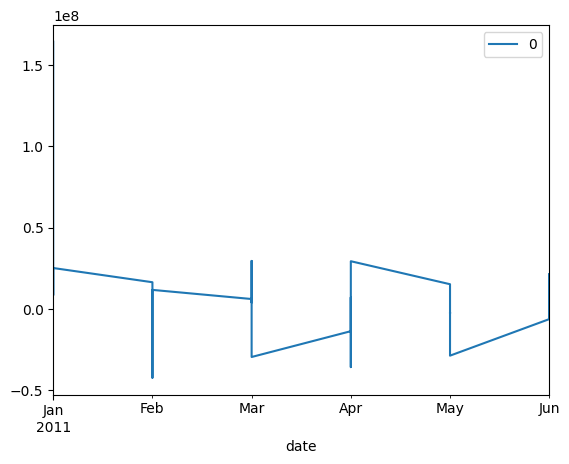

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

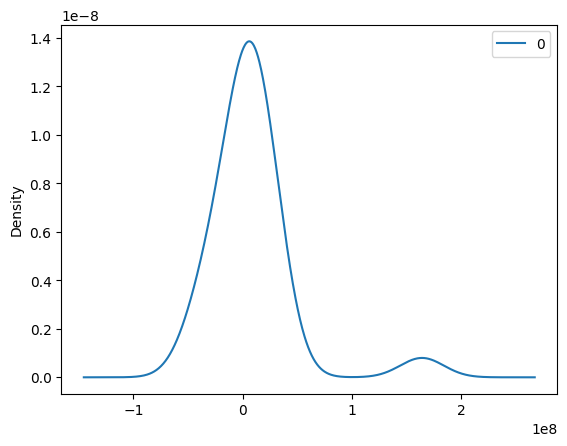

In [ ]:
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
X = series.values

size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

ind_train, ind_test = df.index[0:size], df.index[size:len(X)]

In [ ]:
history = list(train)
predictions = list()

for t in range(len(test)):
  model = sm.tsa.ARIMA(history, order=(2,2,0))
  model_fit = model.fit()

  y_hat = model_fit.forecast()[0]
  predictions.append(y_hat)

  y_real = test[t]
  history.append(y_real)

  print('predicteed=%f, expeected=%f' % (y_hat, y_real))

predicteed=122336896.015945, expeected=124751594.066667
predicteed=131836513.630781, expeected=117436999.366667
predicteed=132102700.846482, expeected=121023933.633333
predicteed=119167738.341694, expeected=82620614.933333
predicteed=73413388.482518, expeected=92843928.300000
predicteed=80120610.650648, expeected=116443430.933333
predicteed=110248138.809512, expeected=127469133.966667
predicteed=143221260.173182, expeected=121391559.133333


* Haga una predicción continua con los datos de prueba, imprima el error (MSE) y la grafica.

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 22753021.125


<function matplotlib.pyplot.show(close=None, block=None)>

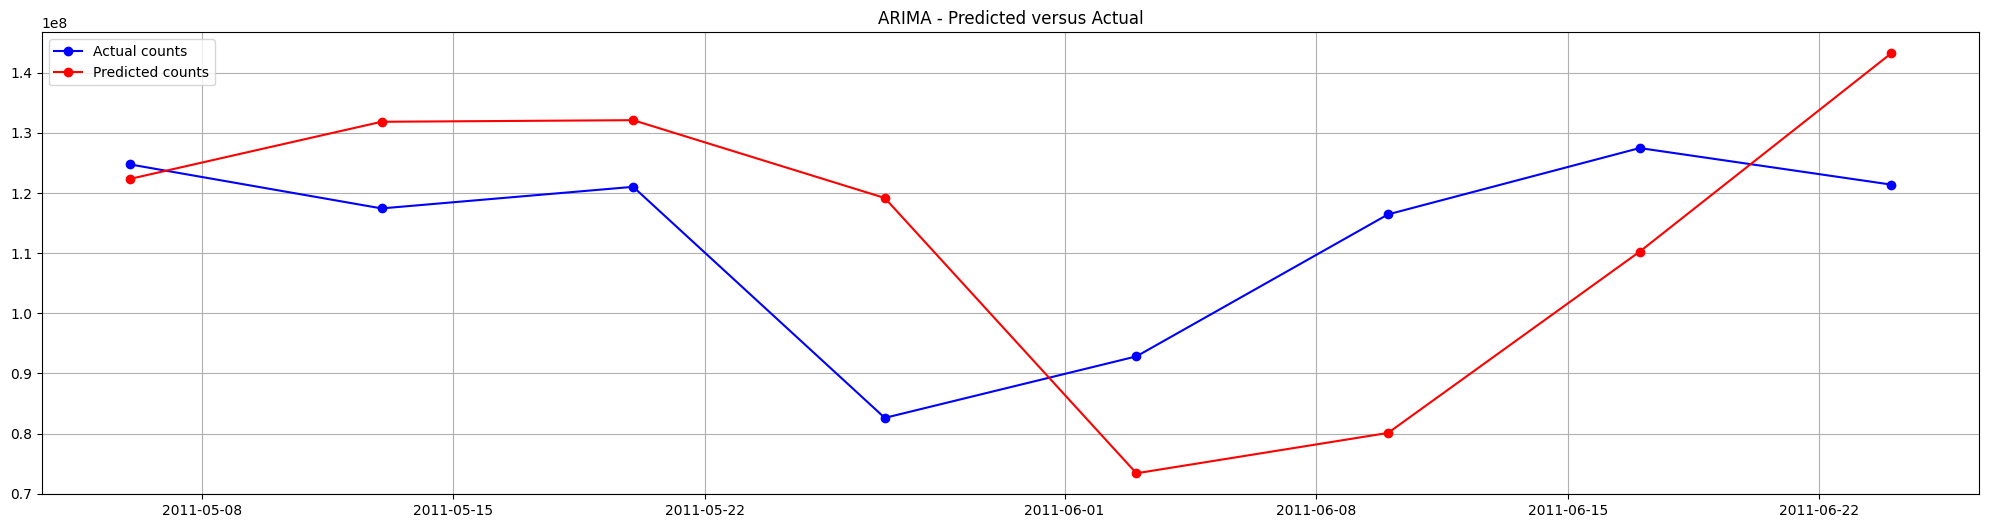

In [ ]:
fig = plt.figure(figsize=(25,6))

actual, = plt.plot(ind_test, test, 'bo-', label='Actual counts')
predicted, = plt.plot(ind_test, predictions, 'ro-', label='Predicted counts')

plt.title('ARIMA - Predicted versus Actual')
plt.legend(handles=[actual, predicted])
plt.grid()
plt.show

* **Compare los resultado con el modelo AR. (En prediccion continua: error, desviacion de los datos predichos con el tiempo, etc.)**

Los modelos AR y ARIMA son modelos de series de tiempo que se utilizan para predecir valores futuros en función de los valores pasados. El modelo AR utiliza los valores pasados de la variable dependiente para predecir los valores futuros. El modelo ARIMA es una extensión del modelo AR que también tiene en cuenta la tendencia y la estacionalidad en los datos.

El modelo ARIMA parece tener un error cuadrático medio (RMSE) más bajo que el modelo AR. Esto sugiere que el modelo ARIMA puede ser mejor para predecir los valores futuros de la variable dependiente que el modelo AR.

* **¿En que situaciones cree que seria mejor utilizar un modelo AR o un ARIMA?**

La elección del modelo adecuado depende de muchos factores, como la naturaleza de los datos y el propósito de la predicción. En general, el modelo AR es adecuado para datos que no tienen una tendencia clara y no están estacionalmente ajustados. Por otro lado, el modelo ARIMA es adecuado para datos que tienen una tendencia clara y/o están estacionalmente ajustados. El modelo ARIMA también puede ser útil para datos que no son estacionarios, ya que utiliza la diferenciación para convertir los datos en estacionarios antes de aplicar el modelo.